In [7]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

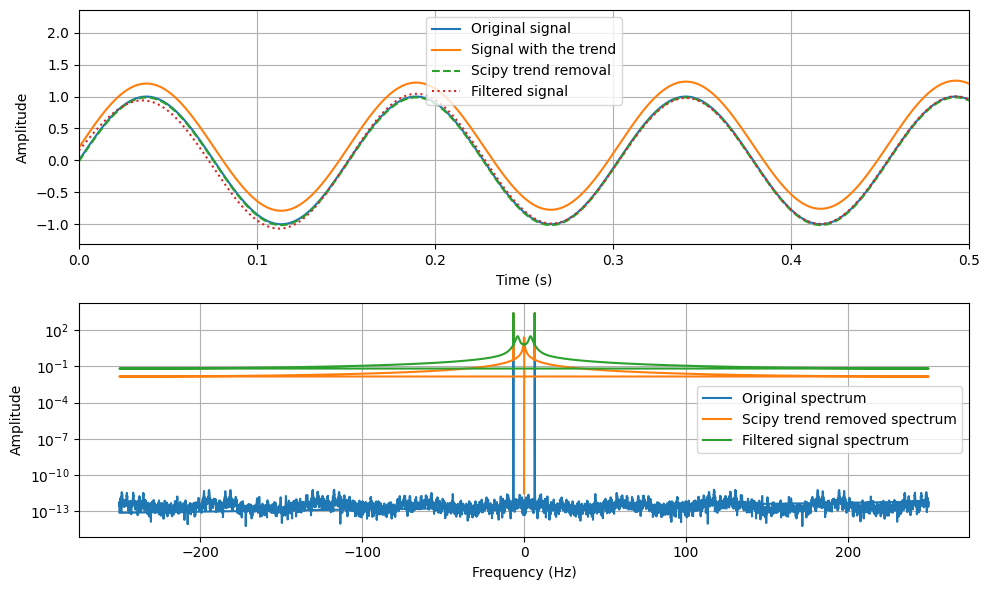

In [10]:
# Set the parameters
L = 10
fs = 500
f0 = 6.6
slope = 0.1
offset = 0.2

# Create the sine wave with desired parameters
t = np.arange(0, L, 1 / fs)
sine = np.sin(2 * np.pi * f0 * t)

# Add linear trend
trend = slope * t + offset
sine_trended = sine + trend

# Use scipy to remove the trend
sine_trend_removed = signal.detrend(sine_trended)

# Use highpass filter to remove the trend. Let's use cutoff 4 Hz, since it was performing the best compared to 2 and 3 Hz.
b, a = signal.butter(6, 4/(0.5*fs), btype='high', analog=False)
filtered_signal = signal.filtfilt(b, a, sine_trended)

# Plot the plots in time domain
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(t, sine, label='Original signal')
plt.plot(t, sine_trended, label='Signal with the trend')
plt.plot(t, sine_trend_removed, label='Scipy trend removal', linestyle='--')
plt.plot(t, filtered_signal, label='Filtered signal', linestyle=':')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim([0, 0.5])
plt.grid()
plt.legend()

# Calculate the Fourier transforms for frequency domain plots
freq = np.fft.fftfreq(len(t), 1/fs)
spectrum_original = np.abs(np.fft.fft(sine))
spectrum_scipy = np.abs(np.fft.fft(sine_trend_removed))
spectrum_filtered = np.abs(np.fft.fft(filtered_signal))

# Frequency domain plots with logarithmic y-axis to highlight the differences
plt.subplot(2, 1, 2)
plt.semilogy(freq, spectrum_original, label='Original spectrum')
plt.semilogy(freq, spectrum_scipy, label='Scipy trend removed spectrum')
plt.semilogy(freq, spectrum_filtered, label='Filtered signal spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()